In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
PROJECT_DIR = Path().resolve()

In [3]:
def categorical_gview(data: pd.DataFrame):
    Path("Graphic_var_view/Categorical").mkdir(parents=True, exist_ok=True)
    cat_vars = data.select_dtypes(include='object')
    for c in cat_vars:
        sns.countplot(data=data, x=c)
        plt.xticks(rotation=0)
        plt.show()
        plt.savefig(f"{PROJECT_DIR}/Graphic_var_view/Categorical/{c}.png", bbox_inches="tight")


In [4]:
def numeric_gview(data: pd.DataFrame):
    Path("Graphic_var_view/Numerical").mkdir(parents=True, exist_ok=True)
    num_vars = data.select_dtypes(include='number')
    for c in num_vars:
        sns.boxplot(data=data, y=c)
        plt.xticks(rotation=0)
        plt.show()
        plt.savefig(f"{PROJECT_DIR}/Graphic_var_view/Numerical/{c}.png", bbox_inches="tight")

In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [6]:
#Exploring dataframe data type:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [7]:
#Exploring numereic data_distribuction:
df_train.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


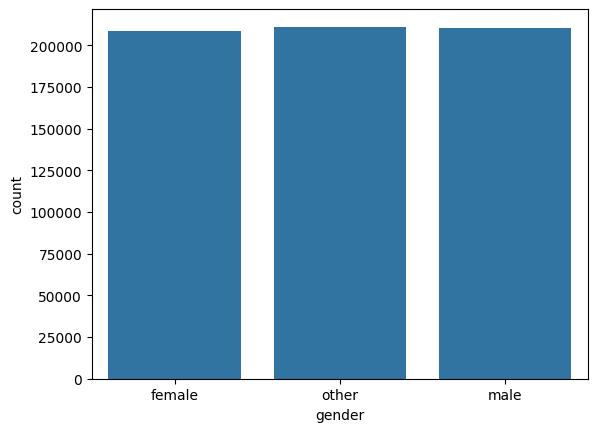

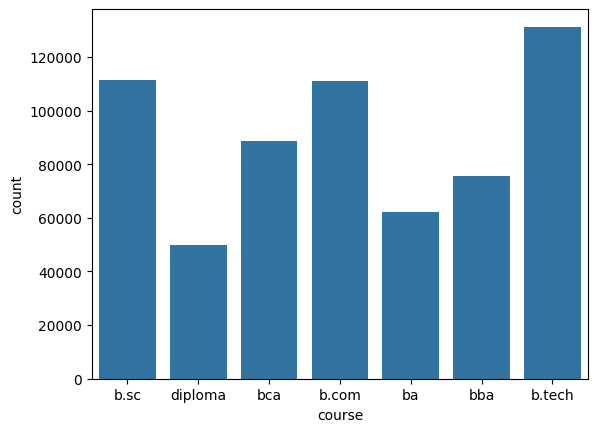

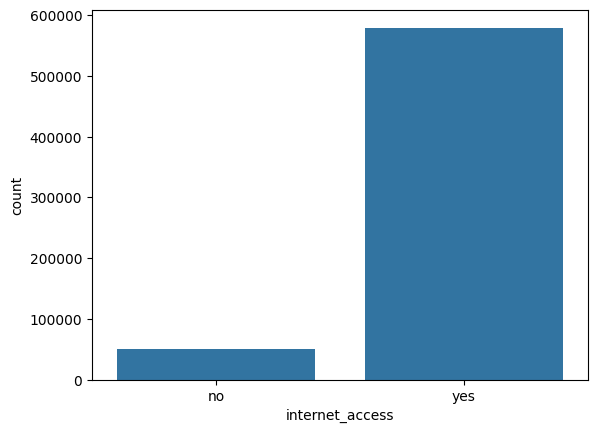

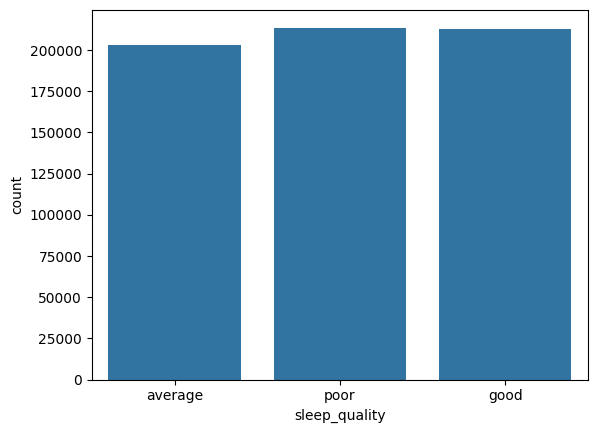

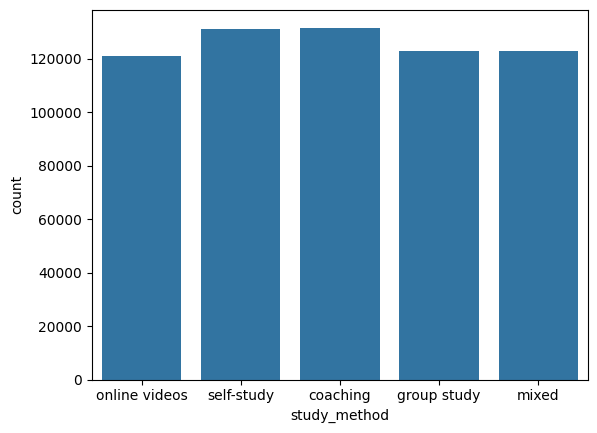

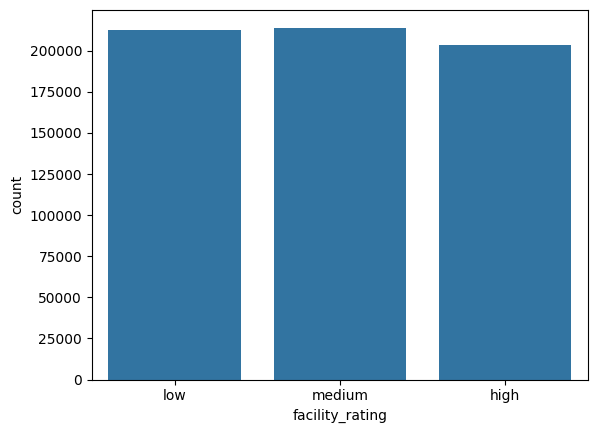

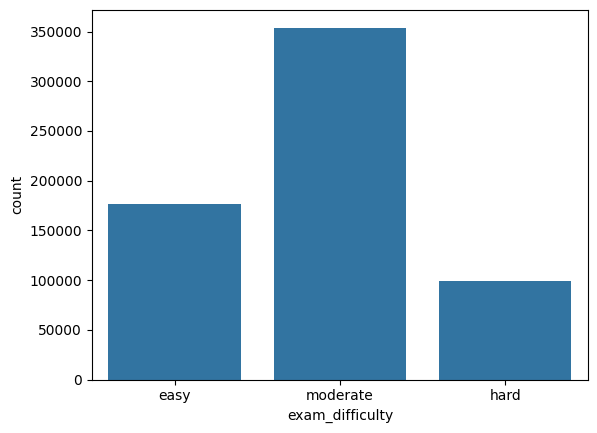

<Figure size 640x480 with 0 Axes>

In [8]:
# Let's check outliers and get a graphic visualization for numeric and chategorical data distribution:
categorical_gview(df_train)

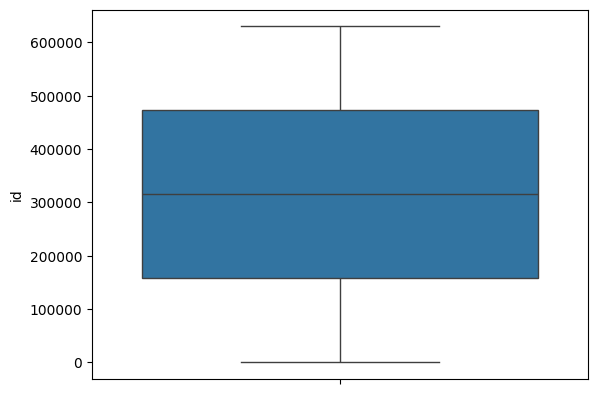

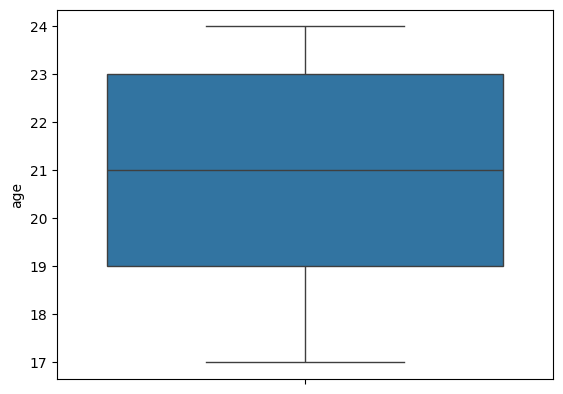

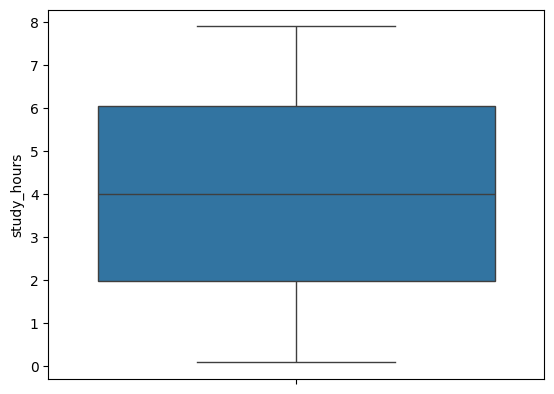

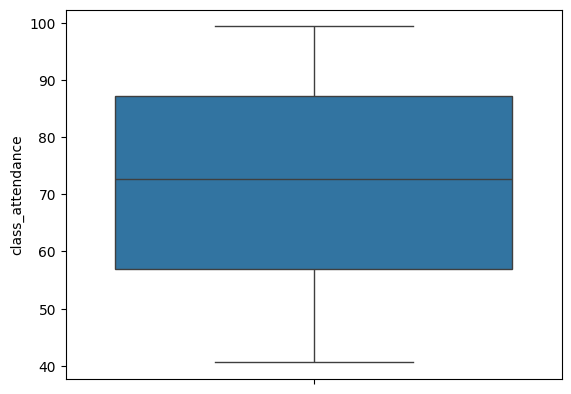

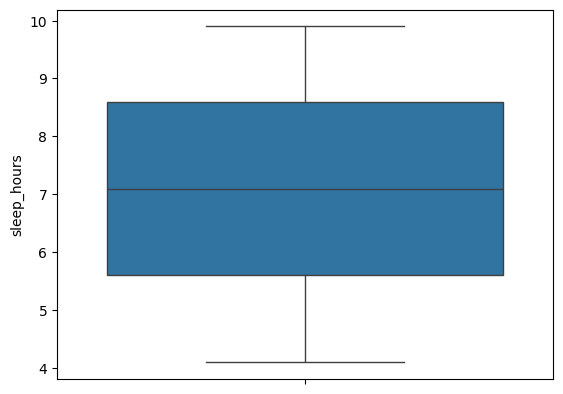

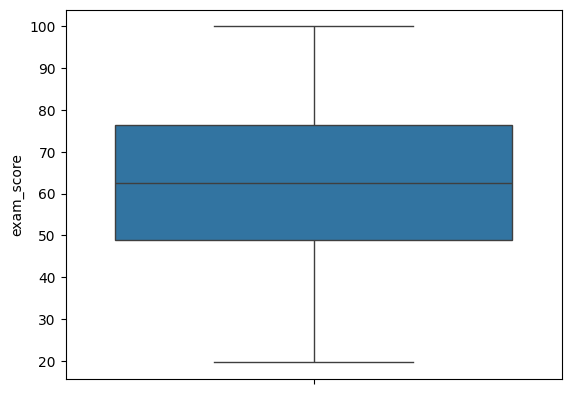

<Figure size 640x480 with 0 Axes>

In [9]:
numeric_gview(df_train)

### Through this verification, we can see that:
There are no outliers in our numerical features <br>
The only largely unbalanced categorical feature is the "internet_acess" feature. <br>
These factors may be important to chose what ML model we will use. <br>
The presence of categorical feature indicates roughly that we could use CatBoost to avoid the need to deal with categorical features using one hod encoding, or dummies, or any related process.


In [10]:
X = df_train.drop('exam_score', axis=1)
y = df_train['exam_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=40028922)


In [12]:
model = CatBoostRegressor(iterations=500, depth=6, learning_rate=0.05, loss_function="RMSE", verbose=100, random_seed=40028922)

In [17]:
cat_vars = X_train.select_dtypes(include="object").columns.tolist()
cat_vars

['gender',
 'course',
 'internet_access',
 'sleep_quality',
 'study_method',
 'facility_rating',
 'exam_difficulty']

In [18]:
model.fit(X_train, y_train, cat_features=cat_vars, eval_set=(X_test, y_test), use_best_model=True)

0:	learn: 18.3179962	test: 18.3215982	best: 18.3215982 (0)	total: 618ms	remaining: 5m 8s
100:	learn: 8.8886518	test: 8.8574083	best: 8.8574083 (100)	total: 31.2s	remaining: 2m 3s
200:	learn: 8.8450351	test: 8.8166271	best: 8.8166271 (200)	total: 57.6s	remaining: 1m 25s
300:	learn: 8.8322407	test: 8.8063241	best: 8.8063241 (300)	total: 1m 23s	remaining: 55.2s
400:	learn: 8.8198350	test: 8.7957092	best: 8.7957092 (400)	total: 1m 49s	remaining: 27.1s
499:	learn: 8.8086425	test: 8.7873488	best: 8.7873488 (499)	total: 2m 17s	remaining: 0us

bestTest = 8.78734875
bestIteration = 499



In [26]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [27]:
y_baseline = np.full_like(y_test, y_train.mean(), dtype=float)
rmse_baseline = np.sqrt(mean_squared_error(y_pred, y_baseline))

In [33]:
print(f'''The average percentage error was {rmse/y_test.mean()*100:.2f}% meaning that, on average, the predictions are this percentage away from
the real values''')

The average percentage error was 14.06% meaning that, on average, the predictions are this percentage away from
the real values


In [34]:
print(f'The model reduced the error by {(1-rmse/rmse_baseline)*100:.2f}%')

The model reduced the error by 47.49%


In [ ]:
y_pred_validation = model.predict(df_test)
y_pred_validation

In [42]:
predict = pd.DataFrame({'id':df_test.id, 'exam_score': y_pred_validation})
predict

,id,exam_score
0,630000,72.283412
1,630001,70.363496
2,630002,87.437333
3,630003,55.347184
4,630004,46.930292
...,...,...
269995,899995,60.320586
269996,899996,38.424051
269997,899997,90.835314
269998,899998,55.664280


In [46]:
predict.to_csv("pred_from_exam_score_submission1.csv", index=False)

In [45]:
import os


os.getcwd()


'C:\\Users\\Matheus\\Desktop\\Projetos_do_kaggle\\Student_prediction'